<h2>What are Electoral Bonds?</h2>
<b style='font-size:18px'>Electoral Bonds were a mode of funding for political parties in India from their introduction in 2017 till they were struck down as unconstitutional by the Supreme Court on 15 February 2024.</b>
</br>
</br>
<b style='font-size:18px'>As the Supreme Court bans the Electoral Bonds, it also orders the State Bank of India to release the data of all transactions of the bonds. Now let's analysis the data released by State Bank of India and draw out some Conclusions</b>

<h3><b>Importing Datasets</b></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b>Reading the data</b></h3>

In [2]:
encashment=pd.read_csv('./EncashmentData.csv')
purchased=pd.read_csv('./PurchaseData.csv')

In [3]:
encashment.head()

,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


In [4]:
purchased.head()

,Date of Purchase,Purchaser Name,Denomination
0,12-Apr-19,A B C INDIA LIMITED,100000.0
1,12-Apr-19,A B C INDIA LIMITED,100000.0
2,12-Apr-19,A B C INDIA LIMITED,1000000.0
3,12-Apr-19,A B C INDIA LIMITED,1000000.0
4,12-Apr-19,A B C INDIA LIMITED,100000.0


<h3><b>Data Preprocessing</b></h3>

<p style='font-size:18px'>Rename the name of the Date of Encashment column</p>

In [5]:
encashment.rename(columns={'Date of\nEncashment':'Date of Encashment'},inplace=True)

In [6]:
encashment.head()

,Date of Encashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


In [7]:
encashment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20846 entries, 0 to 20845
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date of Encashment           20421 non-null  object 
 1   Name of the Political Party  20421 non-null  object 
 2   Denomination                 20421 non-null  float64
dtypes: float64(1), object(2)
memory usage: 488.7+ KB


In [8]:
encashment.shape

(20846, 3)

In [9]:
purchased.shape

(19207, 3)

<p style='font-size:18px'>Changing the dtype of Date of Encashment and Date of Purchased to datetime</p>

In [10]:
encashment['Date of Encashment']=encashment['Date of Encashment'].astype('datetime64[ns]')
purchased['Date of Purchase']=purchased['Date of Purchase'].astype('datetime64[ns]')

<p style='font-size:18px'>Convert the Denomination value to millions as it becomes easy to deal it
</p>

In [11]:
encashment['Denomination']=encashment['Denomination']/1000000
purchased['Denomination']=purchased['Denomination']/1000000

<p style='font-size:18px'>Renaming the Denomination to Denomination(in millions)</p>

In [12]:
encashment.rename(columns={'Denomination':'Denomination(in millions)'},inplace=True)
purchased.rename(columns={'Denomination':'Denomination(in millions)'},inplace=True)

<h4><b>Handling Null values</b></h4>

In [13]:
encashment.isnull().sum()

Date of Encashment             425
Name of the Political Party    425
Denomination(in millions)      425
dtype: int64

In [14]:
purchased.isnull().sum()

Date of Purchase             336
Purchaser Name               336
Denomination(in millions)    336
dtype: int64

<p style='font-size:18px'>Removing Null values</p>

In [15]:
encashment.dropna(inplace=True)
purchased.dropna(inplace=True)

In [16]:
encashment.head(2)

,Date of Encashment,Name of the Political Party,Denomination(in millions)
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1.0
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1.0


In [17]:
purchased.head(2)

,Date of Purchase,Purchaser Name,Denomination(in millions)
0,2019-04-12,A B C INDIA LIMITED,0.1
1,2019-04-12,A B C INDIA LIMITED,0.1


<h4><b>Handling Duplicates</b></h4>

In [18]:
encashment.duplicated().sum()

19577

In [19]:
purchased.duplicated().sum()

16429

<p style='font-size:18px'>The data consists of many duplicated values. Let's remove the the duplicated values in both the tables</p>

In [20]:
encashment.drop_duplicates(ignore_index=True,inplace=True)
purchased.drop_duplicates(ignore_index=True,inplace=True)

<p style='font-size:18px'>Set the Date of Purchase and Date of Encashment as index in their respective tables</p>

In [21]:
encashment.set_index('Date of Encashment',inplace=True)
purchased.set_index('Date of Purchase',inplace=True)

In [22]:
encashment.head()

,Name of the Political Party,Denomination(in millions)
Date of Encashment,,
2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1.0
2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10.0
2019-04-12,BHARAT RASHTRA SAMITHI,10.0
2019-04-12,BHARAT RASHTRA SAMITHI,1.0
2019-04-12,BHARTIYA JANTA PARTY,1.0


In [23]:
purchased.head()

,Purchaser Name,Denomination(in millions)
Date of Purchase,,
2019-04-12,A B C INDIA LIMITED,0.1
2019-04-12,A B C INDIA LIMITED,1.0
2019-04-12,ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED,0.1
2019-04-12,ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED,1.0
2019-04-12,ARIHANT ENTERPRISES,1.0


<h3><b>Exploratory Data Analysis</b></h3>

<b><h3 style='font-size:18px'>Total denomination received by all parties?
</h3></b>

In [24]:
encashment['Denomination(in millions)'].sum()

4545.808

<b style='font-size:18px'>4545 millions of Rupees is funded to all the political parties.</b>

<b><h3>Total denomination funded to all parties by the Purchaser?</h3></b>

In [25]:
purchased['Denomination(in millions)'].sum()

12775.062000000002

<b style='font-size:18px'>12775 millions of Rupees is funded by all the purchasers.</b>
</br>
<p style='font-size:18px'>The data may not be exactly correct as we removed some values in the table (null values).</p>

<b><h3>Total denominations received by each party?</h3></b>

In [26]:
total_funds=encashment.groupby('Name of the Political Party').sum()

total_funds.sort_values(by='Denomination(in millions)',ascending=False)

,Denomination(in millions)
Name of the Political Party,
BHARTIYA JANTA PARTY,929.953
"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",877.861
ALL INDIA TRINAMOOL CONGRESS,703.142
BHARAT RASHTRA SAMITHI,387.721
BIJU JANATA DAL,328.000
TELUGU DESAM PARTY,230.300
AAM AADMI PARTY,207.900
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,195.300
SHIVSENA (POLITICAL PARTY),150.611


<p style='font-size:18px'>Visualizing the above data</p>

In [27]:
plt.style.use('ggplot')

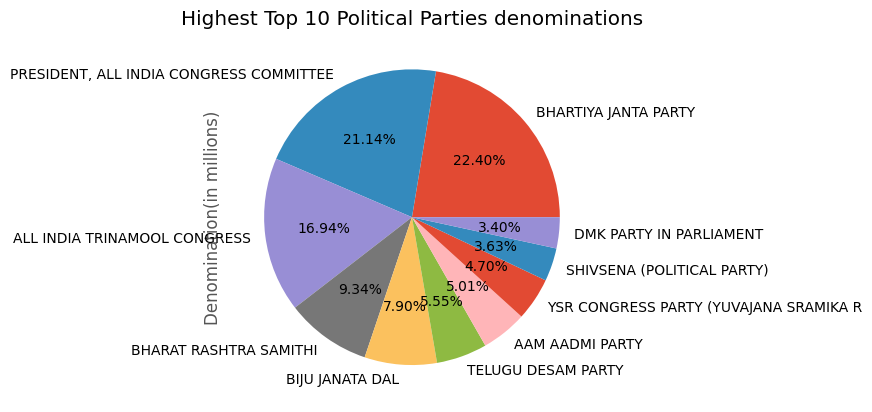

In [28]:
total_funds.nlargest(n=10,columns='Denomination(in millions)').plot(kind='pie',y='Denomination(in millions)',autopct='%.2f%%')
plt.title('Highest Top 10 Political Parties denominations')
plt.legend().remove();

<b style='font-size:18px'> From the above Pie Chart Bharatiya Janata Party(BJP) receieved highest denomination and next to BJP All India Congress Committee received highest denomination.</b>
<br>
<b style='font-size:18px'>In regional level, All India Trinamool Congress had received highest denomination and then Bharat Rastra Samithi.</b>

<b><h3>Total denominations purchased by individual Purchasers?</h3></b>

In [29]:
purchaser=purchased.groupby('Purchaser Name').sum()

purchaser.sort_values(by='Denomination(in millions)',ascending=False)

,Denomination(in millions)
Purchaser Name,
FUTURE GAMING AND HOTEL SERVICES PR,200.000
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,200.000
HALDIA ENERGY LIMITED,162.000
MKJ ENTERPRISES LIMITED,136.200
VEDANTA LIMITED,121.100
...,...
ARAVIND S,0.001
PAWAN AGARWAL,0.001
DAMINI NATH,0.001


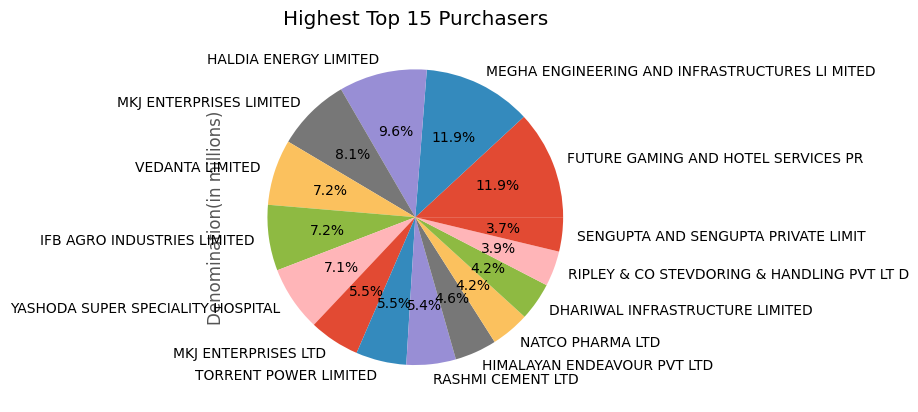

In [30]:
purchaser.nlargest(columns='Denomination(in millions)',n=15).plot(kind='pie',y='Denomination(in millions)',autopct='%.1f%%')
plt.title('Highest Top 15 Purchasers');
plt.legend().remove();

<b style='font-size:18px'>From the above Pie Chart Megha Engineering and Infrastructures Limited and Future Gaming and Hotel Services are the top purchasers of Electoral bonds</b>

<b><h3>Denominations received in each year</h3></b>

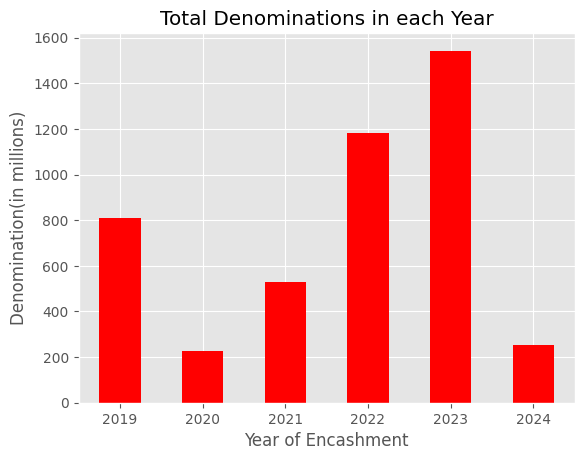

In [31]:
encashment.groupby(encashment.index.year).sum(numeric_only=True).plot(kind='bar',color='red')
plt.title('Total Denominations in each Year')
plt.xlabel('Year of Encashment')
plt.ylabel('Denomination(in millions)')
plt.xticks(rotation=360)
plt.legend().remove();

<b style='font-size:18px'> From the above Bar Graph, most of the denominations are received in the year 2023.</b>
<b style='font-size:18px'> As electoral bonds are introduced in 2019, denominations received are medium.</b>
<b style='font-size:18px'> In the year 2020 and 2021, less denominations are received due to the impact of Covid pandemic. But the denominations are increasing slowly after pandemic.</b>